# Check energy scale with fixed position/energy events

This notebook is devoted to make a comparison among the energy scales of the different data types.

In [40]:
from __future__ import print_function
import tables as tb
import numpy as np
import matplotlib.pyplot as plt
import time

import Core.mplFunctions as mpl
import Core.fitFunctions as fit
import Core.tblFunctions as tbl
import Database.loadDB as DB
from Core.Bridges import Signal, Peak, PMap


plt.rcParams['figure.figsize'] = (12, 8) # Larger plots
%matplotlib inline
%load_ext autoreload
%autoreload 2

print("This notebook has been run last on {} at {}.".format(time.strftime("%d/%m/%Y"),time.strftime("%H:%M:%S")))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
This notebook has been run last on 19/11/2016 at 12:58:46.


## This notebook needs data passing through DIOMIRA & ISIDORA

In [43]:
try:
    h5f.close()
except:
    pass

In [44]:
h5f = tb.open_file('/Users/Gonzalo/github/IC/data/MC/e40_RWF.h5')
print(h5f)

/Users/Gonzalo/github/IC/data/MC/e40_RWF.h5 (File) ''
Last modif.: 'Fri Nov 18 18:35:31 2016'
Object Tree: 
/ (RootGroup) ''
/MC (Group) ''
/MC/FEE (Table(1,)) 'EP-FEE parameters'
/MC/MCTracks (Table(4862,), zlib(4)) ''
/RD (Group) ''
/RD/pmtacum (EArray(1000, 12, 32000), shuffle, zlib(4)) ''
/RD/pmtblr (EArray(1000, 12, 32000), shuffle, zlib(4)) ''
/RD/pmtcwf (EArray(1000, 12, 32000), shuffle, zlib(4)) ''
/RD/pmtrwf (EArray(1000, 12, 32000), shuffle, zlib(4)) ''
/RD/sipmrwf (EArray(1000, 1792, 800), shuffle, zlib(4)) ''
/TWF (Group) ''
/TWF/PMT (Table(13777,), shuffle, zlib(4)) 'Store for PMTs TWF'
/TWF/SiPM (Table(36616,), shuffle, zlib(4)) 'Store for SiPM TWF'



In [45]:
fee_tabl = h5f.root.MC.FEE

pmttwf   = h5f.root.TWF.PMT
sipmtwf  = h5f.root.TWF.SiPM

pmtrwf   = h5f.root.RD.pmtrwf
sipmrwf  = h5f.root.RD.sipmrwf
pmtblr   = h5f.root.RD.pmtblr
pmtcwf   = h5f.root.RD.pmtcwf

pmtdf    = DB.DataPMT()
sipmdf   = DB.DataSiPM()

### Sensor data:

In [48]:
print(pmtdf)

    channel pmtid  active           x           y   coeff_c  coeff_blr  \
0         0     1       1  -23.941401   65.778503  0.000003   0.001632   
1        18     3       1  -44.995098  -53.623100  0.000003   0.001632   
2         1     2       1   68.936501  -12.155400  0.000003   0.001611   
3        19     4       1    0.000000  185.000000  0.000003   0.001599   
4        27     C       1 -118.916000  141.718002  0.000003   0.001567   
5        26     B       1 -182.188995   32.124901  0.000004   0.001650   
6         9     A       1 -160.214996  -92.500000  0.000003   0.001593   
7         8     9       1  -63.273701 -173.843002  0.000003   0.001612   
8        23     8       1   63.273701 -173.843002  0.000003   0.001601   
9        22     7       1  160.214996  -92.500000  0.000003   0.001593   
10        5     6       1  182.188995   32.124901  0.000003   0.001575   
11        4     5       1  118.916000  141.718002  0.000003   0.001596   

    adc_to_pes  noise_rms  
0     -22

In [49]:
print(sipmdf)

      sensorID  active      x      y  adc_to_pes  noise_rms
0         1000       1 -235.0   45.0     16.6974        0.0
1         1001       1 -235.0   55.0     15.9397        0.0
2         1002       1 -235.0   65.0     17.6442        0.0
3         1003       1 -235.0   75.0     16.4338        0.0
4         1004       1 -235.0   85.0     17.3464        0.0
5         1005       1 -235.0   95.0     17.0949        0.0
6         1006       1 -235.0  105.0     15.6702        0.0
7         1007       1 -235.0  115.0     15.8094        0.0
8         1008       1 -225.0   45.0     16.4761        0.0
9         1009       1 -225.0   55.0     16.5684        0.0
10        1010       1 -225.0   65.0     16.7487        0.0
11        1011       1 -225.0   75.0     15.9977        0.0
12        1012       1 -225.0   85.0     16.1002        0.0
13        1013       1 -225.0   95.0     15.9574        0.0
14        1014       1 -225.0  105.0     15.5917        0.0
15        1015       1 -225.0  115.0    

### FEE table:


In [50]:
for i in fee_tabl.colnames: print(i, '->', fee_tabl.col(i)[0])

OFFSET -> 2500
CEILING -> 4096
PMT_GAIN -> 1.7e+06
FEE_GAIN -> 9.32847e-14
R1 -> 2.51061e-13
C1 -> 1.69394e+19
C2 -> 4.99321e+16
ZIN -> 9.9335e-15
DAQ_GAIN -> 1.25
NBITS -> 12.0
LSB -> 3.90625e-10
NOISE_I -> 3349.96
NOISE_DAQ -> 3.13e-10
t_sample -> 25.0
f_sample -> 0.04
f_mc -> 1.0
f_LPF1 -> 0.003
f_LPF2 -> 0.01
coeff_c -> [  2.90544700e-06   3.08000000e-06   2.80060000e-06   2.75626500e-06
   3.13876600e-06   3.96517600e-06   2.71100000e-06   3.12764100e-06
   3.06454300e-06   3.04046300e-06   3.11360400e-06   3.18597900e-06]
coeff_blr -> [ 0.00163241  0.00163241  0.0016111   0.00159936  0.00156696  0.00164962
  0.00159296  0.00161207  0.00160068  0.00159272  0.00157519  0.00159632]
adc_to_pes -> [-22.91679955 -23.75099945 -25.30080032 -25.99839973 -23.70739937
 -20.8927002  -22.13400078 -33.09930038 -20.43770027 -25.1697998
 -15.85569954 -18.21299934]
pmt_noise_rms -> [ 0.70599997  0.87440002  0.72130001  0.76239997  0.79210001  0.866       0.7062
  0.72780001  0.73030001  0.7160000

### Plot of the PMT TWF, RWF, BLR for event 0, PMT 0

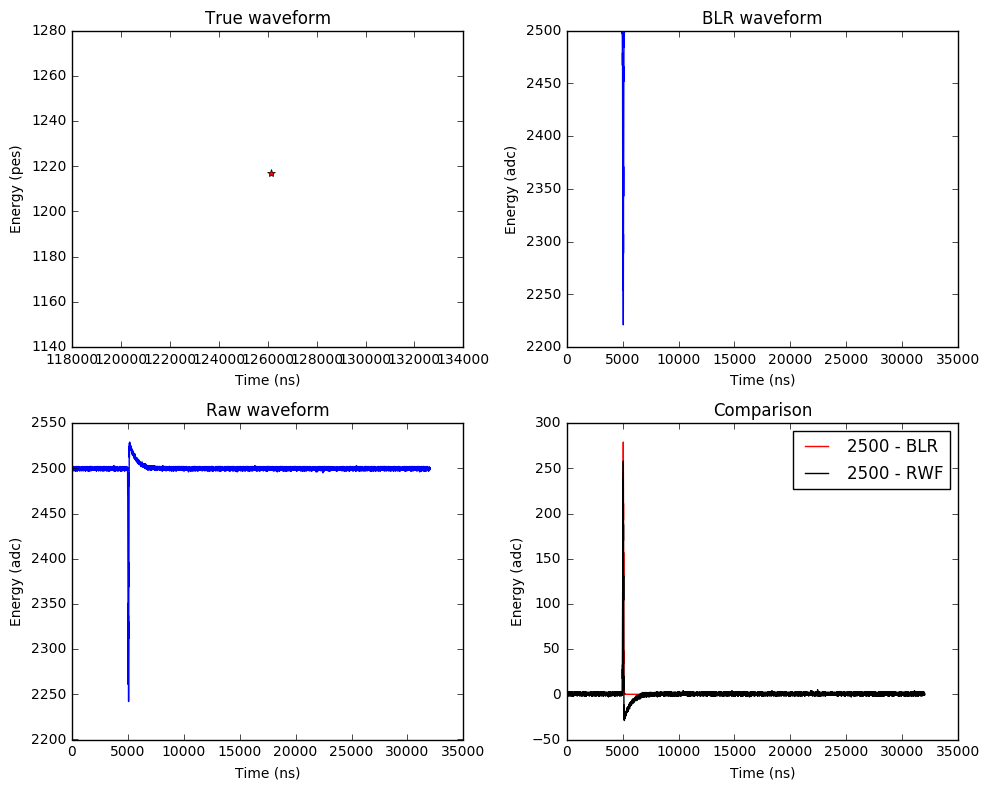

In [55]:
evt = 0
pmt = 0
Tt, Te = tbl.read_sensor_wf(pmttwf, evt, pmt)

fig, axes = plt.subplots(2, 2)
axes[0,0].plot(Tt,Te, "*r")
axes[0,1].plot(pmtblr[evt, pmt])
axes[1,0].plot(pmtrwf[evt, pmt])
axes[1,1].plot(2500-pmtblr[evt, pmt], 'r', label='2500 - BLR')
axes[1,1].plot(2500-pmtrwf[evt, pmt], 'k', label='2500 - RWF')

axes[0,0].set_xlabel('Time (ns)');axes[0,0].set_ylabel('Energy (pes)');axes[0,0].set_title('True waveform')
axes[0,1].set_xlabel('Time (ns)');axes[0,1].set_ylabel('Energy (adc)');axes[0,1].set_title('BLR waveform')
axes[1,0].set_xlabel('Time (ns)');axes[1,0].set_ylabel('Energy (adc)');axes[1,0].set_title('Raw waveform')
axes[1,1].set_xlabel('Time (ns)');axes[1,1].set_ylabel('Energy (adc)');axes[1,1].set_title('Comparison')

axes[1,1].legend()

fig.set_size_inches(10,8)
fig.tight_layout()

### Plot of the RWF, BLR and CWF for event 0 PMT 0:

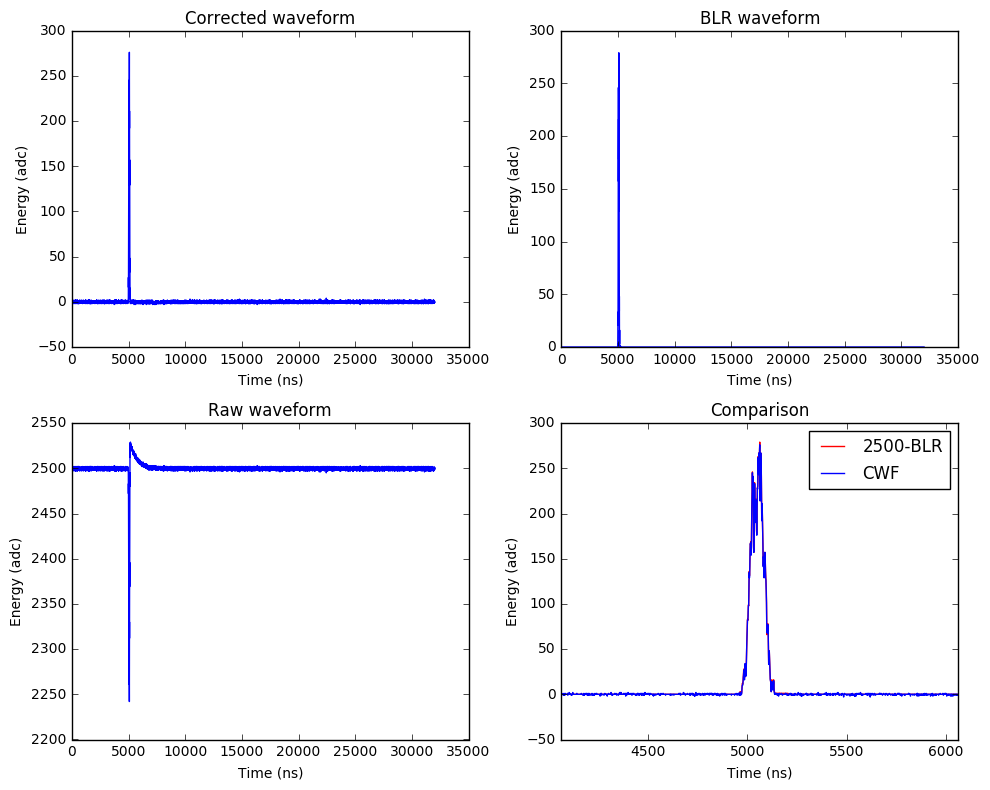

In [56]:
evt = 0
pmt = 0
fig, axes = plt.subplots(2, 2)
axes[0,0].plot(pmtcwf[evt, pmt])
axes[0,1].plot(2500-pmtblr[evt, pmt])
axes[1,0].plot(pmtrwf[evt, pmt])
axes[1,1].plot(2500-pmtblr[evt, pmt], 'r', label='2500-BLR')
#axes[1,1].plot(2500-pmtrwf[evt, pmt], 'k', label='2500-RWF')
axes[1,1].plot(pmtcwf[evt, pmt], 'b', label='CWF')

peak, window = np.argmax(pmtcwf[evt, pmt]), 1000

axes[0,0].set_xlabel('Time (ns)');axes[0,0].set_ylabel('Energy (adc)');axes[0,0].set_title('Corrected waveform')
axes[0,1].set_xlabel('Time (ns)');axes[0,1].set_ylabel('Energy (adc)');axes[0,1].set_title('BLR waveform')
axes[1,0].set_xlabel('Time (ns)');axes[1,0].set_ylabel('Energy (adc)');axes[1,0].set_title('Raw waveform')
axes[1,1].set_xlabel('Time (ns)');axes[1,1].set_ylabel('Energy (adc)');axes[1,1].set_title('Comparison')
axes[1,1].set_xlim((peak-window, peak+window))
axes[1,1].legend()

fig.set_size_inches(10,8)
fig.tight_layout()
#axes[0,0].set_xlim((10000,12000))
#axes[0,0].set_ylim((-10,10))


- The corrected waveform and the BLR look pretty similar

## Statistical studies about energy

In [65]:
nevts, npmt, pmtwl = pmtcwf.shape
Etrue = np.empty(nevts)
Eblr = np.empty(nevts)
Ecorr = np.empty(nevts)

adc_to_pes_cor = abs(1.0/pmtdf.adc_to_pes.reshape(npmt, 1))
adc_to_pes_blr = abs(1.0/pmtdf.adc_to_pes.reshape(npmt, 1))

for i in range(nevts):
    # select data above 7 adc counts to integrate the peak and
    # ignore the noise
    selection = reduce(lambda x,y: x & y, [pmtcwf[i,j] > 5 for j in range(npmt)])
    Ecorr[i] = np.sum(pmtcwf[i] * adc_to_pes_cor, axis=0)[selection].sum()
    Eblr[i] = np.sum((2500-pmtblr[i]) * adc_to_pes_cor, axis=0)[selection].sum()
    Etrue[i] = tbl.read_wf_table(pmttwf,i).sum().sum(axis=1).ene_pes

#selection = (Ecorr>0)# & (Ecorr<np.mean(Ecorr)+5*np.std(Ecorr))
#Ecorr = Ecorr[selection]
#Eblr = Eblr[selection]
#Etrue = Etrue[selection]

Ratio_CT = Ecorr/Etrue
Ratio_CB = Ecorr/Eblr
Ratio_BT = Eblr/Etrue

### Comparison between true and corrected

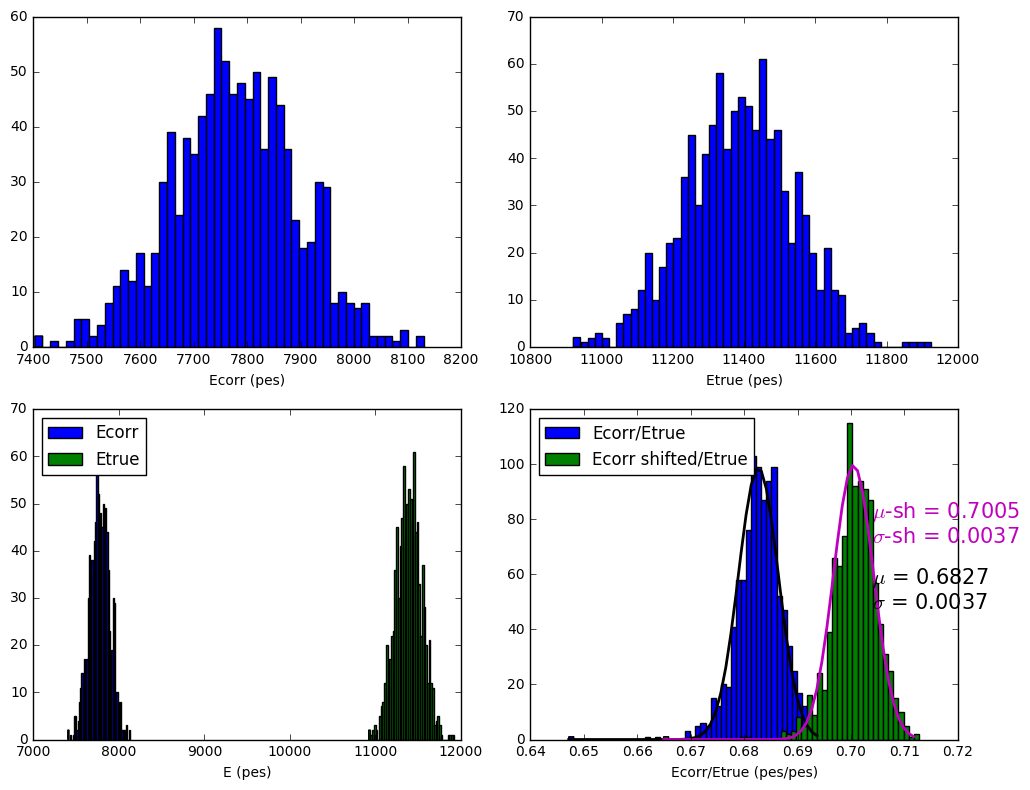

In [66]:
nbins = 50
vals, cov = fit.fit_polynom(Etrue, Ecorr, (100., 1.))
c0, c1 = vals

R = Ratio_CT
R_shift = (Ecorr-c0)/Etrue

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(10, 8)

hcorr  = axes[0,0].hist(Ecorr, nbins)
htrue  = axes[0,1].hist(Etrue, nbins)
hcorr  = axes[1,0].hist(Ecorr, nbins, label='Ecorr')
htrue  = axes[1,0].hist(Etrue, nbins, label='Etrue')

axes[1,0].legend(loc='upper left')
hR = axes[1,1].hist(R, nbins, label='Ecorr/Etrue')
hR_shift= axes[1,1].hist(R_shift, nbins, label='Ecorr shifted/Etrue', color='g')
axes[1,1].legend(loc='upper left')

axes[0,0].set_xlabel('Ecorr (pes)')
axes[0,1].set_xlabel('Etrue (pes)')
axes[1,0].set_xlabel('E (pes)')
axes[1,1].set_xlabel('Ecorr/Etrue (pes/pes)')

xlim = axes[1,1].get_xlim()
ylim = axes[1,1].get_ylim()

x, y = hR[1][:-1], hR[0]
vals, cov = fit.fit_gauss(x, y, (np.max(y), np.mean(x), np.std(x)))
amp, mu, sigma = vals
y = fit.build_gauss(*vals)(x)
axes[1,1].plot(x, y, 'k-', linewidth=2)

x = xlim[0] + 0.8*(xlim[1]-xlim[0])
y = ylim[0] + 0.4*(ylim[1]-ylim[0])
axes[1,1].text(x, y, '$\mu$ = {:.4f}\n$\sigma$ = {:.4f}'.format(mu, sigma), fontsize=15, color='k')


x, y = hR_shift[1][:-1], hR_shift[0]
vals, cov = fit.fit_gauss(x, y, (np.max(y), np.mean(x), np.std(x)))
amp, mu, sigma = vals
y = fit.build_gauss(*vals)(x)
axes[1,1].plot(x, y, 'm-', linewidth=2)

x = xlim[0] + 0.8*(xlim[1]-xlim[0])
y = ylim[0] + 0.6*(ylim[1]-ylim[0])
axes[1,1].text(x, y, '$\mu$-sh = {:.4f}\n$\sigma$-sh = {:.4f}'.format(mu, sigma), fontsize=15, color='m')

plt.tight_layout()


- The energy scale of the CWF does not match the true one, but it seems to be purely a scale factor.
- The absolute sigma is 0.37%, but because the $\mu$ is different from 1, it translates to 0.54%

### Statistical studies about energy: comparison between BLR and corrected

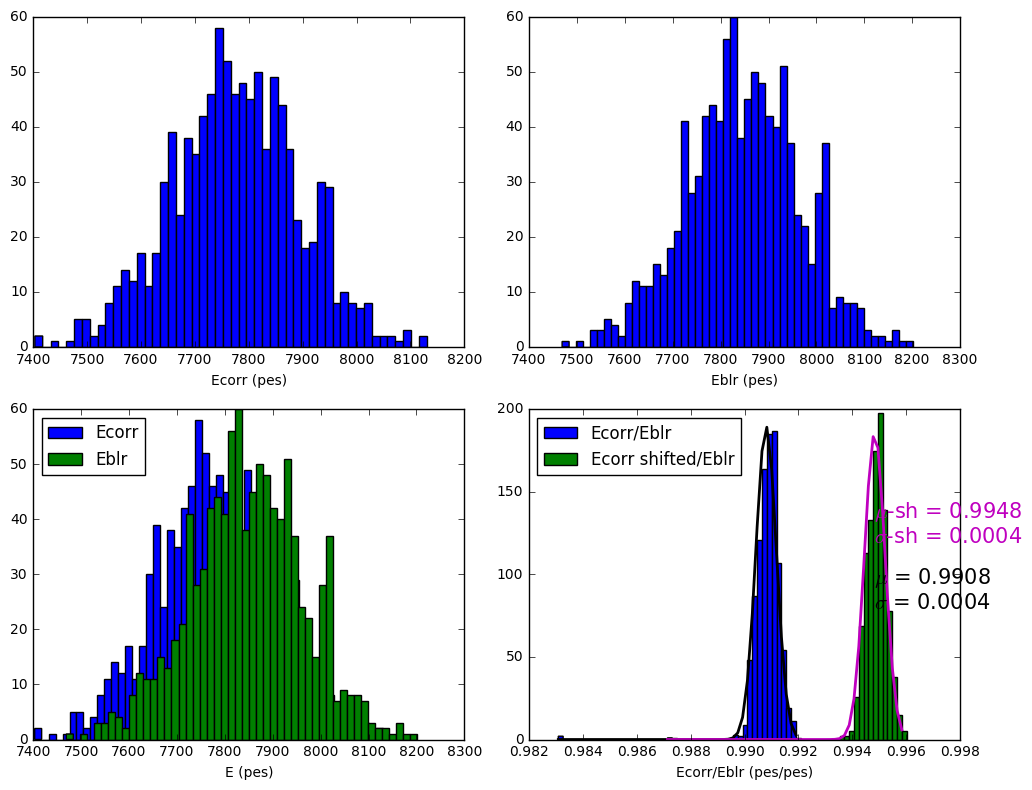

In [67]:
nbins = 50

vals, cov = fit.fit_polynom(Eblr, Ecorr, (100.,1.))
c0, c1 = vals

R = Ratio_CB
R_shift = (Ecorr-c0)/Eblr

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(10, 8)

hcorr = axes[0,0].hist(Ecorr, nbins)
hblr = axes[0,1].hist(Eblr, nbins)
hcorr = axes[1,0].hist(Ecorr, nbins, label='Ecorr')
hblr = axes[1,0].hist(Eblr, nbins, label='Eblr')

axes[1,0].legend(loc='upper left')
hR = axes[1,1].hist(R, nbins, label='Ecorr/Eblr')
hR_shift = axes[1,1].hist(R_shift, nbins, label='Ecorr shifted/Eblr', color='g')
axes[1,1].legend(loc='upper left')

axes[0,0].set_xlabel('Ecorr (pes)')
axes[0,1].set_xlabel('Eblr (pes)')
axes[1,0].set_xlabel('E (pes)')
axes[1,1].set_xlabel('Ecorr/Eblr (pes/pes)')

xlim = axes[1,1].get_xlim()
ylim = axes[1,1].get_ylim()

x, y = hR[1][:-1], hR[0]
vals, cov = fit.fit_gauss(x, y, (np.max(y), np.mean(x), np.std(x)))
amp, mu, sigma = vals
y = fit.build_gauss(*vals)(x)
axes[1,1].plot(x, y, 'k-', linewidth=2)

x = xlim[0] + 0.8*(xlim[1]-xlim[0])
y = ylim[0] + 0.4*(ylim[1]-ylim[0])
axes[1,1].text(x, y, '$\mu$ = {:.4f}\n$\sigma$ = {:.4f}'.format(mu,sigma), fontsize=15, color='k')


x, y = hR_shift[1][:-1], hR_shift[0]
vals, cov = fit.fit_gauss(x, y,(np.max(y),np.mean(x),np.std(x)))
amp, mu, sigma = vals
y = fit.build_gauss(*vals)(x)
axes[1,1].plot(x, y, 'm-', linewidth=2)

x = xlim[0] + 0.8*(xlim[1]-xlim[0])
y = ylim[0] + 0.6*(ylim[1]-ylim[0])
axes[1,1].text(x, y, '$\mu$-sh = {:.4f}\n$\sigma$-sh = {:.4f}'.format(mu, sigma), fontsize=15, color='m')

plt.tight_layout()

- The energy scale of the CWF matches the one from the blr. The only difference is probably caused by the HPF.
- The absolute sigma is 0.04%.